In [86]:
import numpy as np
import pandas as pd

In [87]:
df = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')
df_sub = pd.read_csv('Data/sample_submission.csv')

# EDA
In this EDA we will do the following:
1. Describe the training and testing datasets
2. Create numerical and categorical data analysis functions to analyze training and test dataset features
3. Missing value analysis
4. Find correlations between numerical features, categorical features and targets
5. Create a feature engineering function as part of preprocessor
6. Create a pipeline to preprocess data and train a model

# Describe the data 

In [88]:
def data_description(df,name):
    display(df.head(2))
    display(df.tail(2))
    print(f"Shape: {df.shape}")
    print(f"Columns of {name}: {df.columns}")
    print(f"Datatypes: {df.dtypes}")
    print(f"Duplicated {df.duplicated().sum()}")
    num_cols = df.drop(columns=['id']).select_dtypes(include=['number']).columns
    cat_cols = df.drop(columns=['id']).select_dtypes(exclude=['number']).columns
    print(f"Numerical Values: {num_cols}")
    print(f"Number of numerical values: {len(num_cols)}")
    print(f"Categorical Values: {cat_cols}")
    print(f"Number of numerical values: {len(cat_cols)}")

In [89]:
data_description(df,"Training dataset")

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0
58644,58644,31,75000,MORTGAGE,2.0,VENTURE,B,15000,11.11,0.20,N,5,0


Shape: (58645, 13)
Columns of Training dataset: Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')
Datatypes: id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object
Duplicated 0
Numerical Values: Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_in

In [90]:
data_description(df_test,"Test dataset")

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4
39097,97742,31,45000,RENT,6.0,DEBTCONSOLIDATION,B,19450,9.91,0.44,N,9


Shape: (39098, 12)
Columns of Test dataset: Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')
Datatypes: id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
Duplicated 0
Numerical Values: Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object

# Observations
1. In the training dataset there are 11 features and 1 target column (dropping the ID), the test dataset has 11 features only
2. There are 58645 rows of training data and 39098 rows of test data
3. The test data appears to be an extension of the training data judging by the ID, with the target feature masked/removed
4. There are a mix of numerical and categorical columns

# Break data into numerical and categorical values

In [91]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [92]:
num_cols = df.drop(columns=['id','loan_status']).select_dtypes(include="number").columns
cat_cols = df.drop(columns='id').select_dtypes(exclude="number").columns

In [93]:
print(num_cols)
print(cat_cols)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')
Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


# Numerical Data Analysis
1. Describe for test and train data
2. Boxplots and Histograms for both test and train data
3. Skewness and kurtosis

In [94]:
df[num_cols].describe().style.background_gradient(cmap='viridis')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,64046.172871,4.701015,9217.556518,10.677874,0.159238,5.813556
std,6.033216,37931.106979,3.959784,5563.807384,3.034697,0.091692,4.029196
min,20.000000,4200.000000,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,42000.000000,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,26.000000,58000.000000,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,30.000000,75600.000000,7.000000,12000.000000,12.990000,0.210000,8.000000
max,123.000000,1900000.000000,123.000000,35000.000000,23.220000,0.830000,30.000000


In [95]:
df_test[num_cols].describe().style.background_gradient(cmap='viridis')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,27.566781,64060.460842,4.687068,9251.466188,10.661216,0.159573,5.830707
std,6.032761,37955.828705,3.868395,5576.254680,3.020220,0.091633,4.072157
min,20.000000,4000.000000,0.000000,700.000000,5.420000,0.000000,2.000000
25%,23.000000,42000.000000,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,26.000000,58000.000000,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,30.000000,75885.000000,7.000000,12000.000000,12.990000,0.210000,8.000000
max,94.000000,1900000.000000,42.000000,35000.000000,22.110000,0.730000,30.000000


**Datasets appear to be very similar and therefore further analysis will be performed on training dataset only**

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [97]:
def num_col_plots(df,cols):
    fig,axs = plt.subplots(len(cols),2,figsize=(10,2*len(cols)))
    for i,col in enumerate(cols):
        axs[i,0].set_title(f"Hist plot for {col}")
        sns.histplot(data=df,x=col,ax=axs[i,0],kde=True)
        axs[i,1].set_title(f"Boxplot for {col}")
        sns.boxplot(data=df,x=col,ax=axs[i,1])

    plt.tight_layout()
    plt.show()

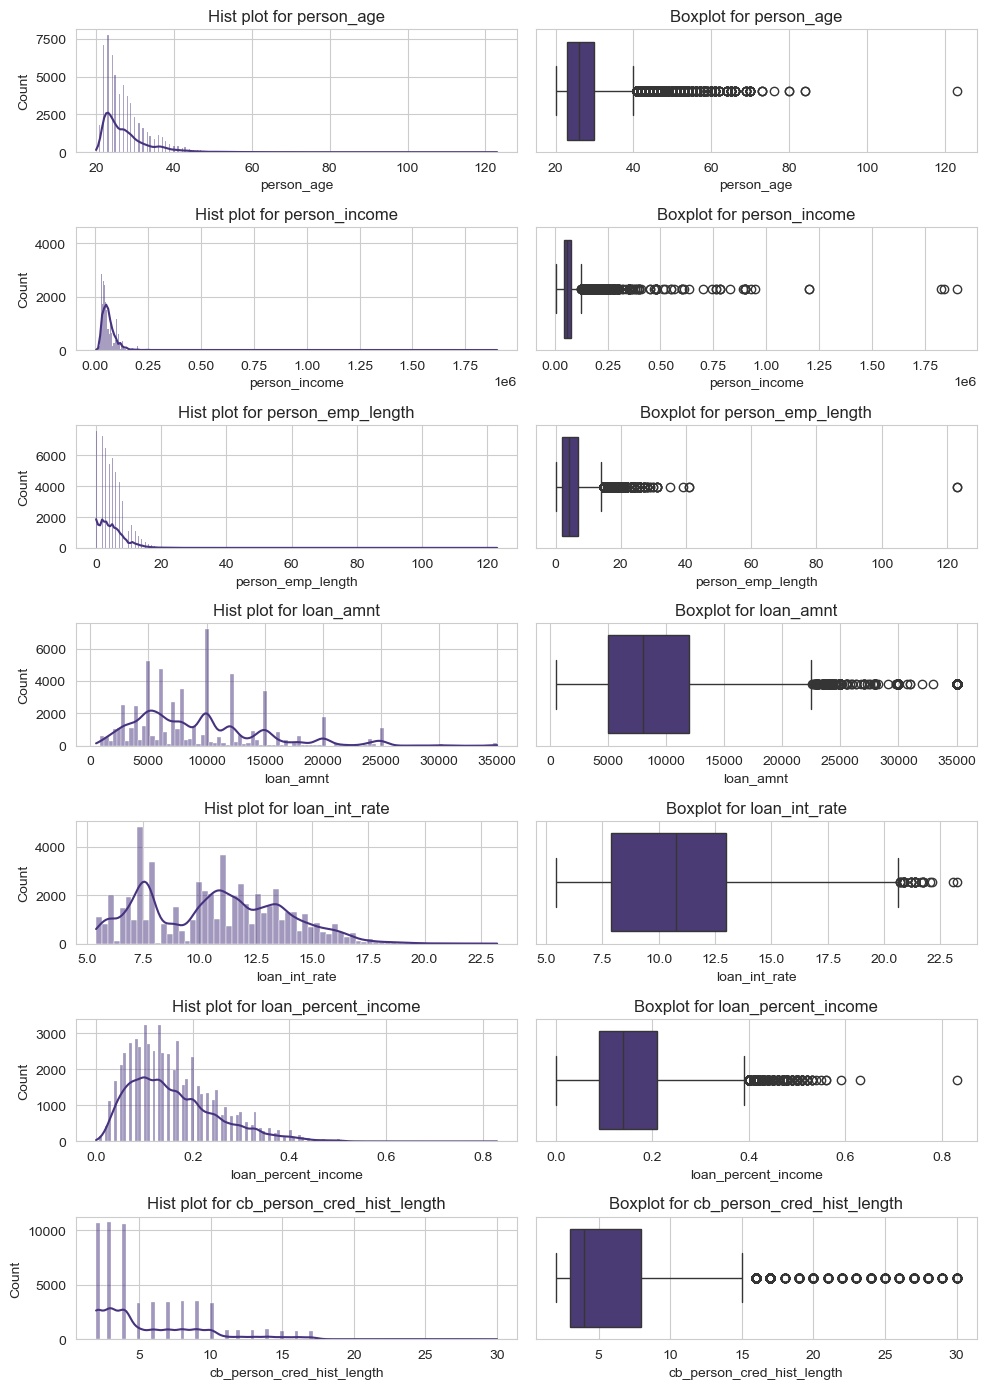

In [98]:
num_col_plots(df,num_cols)

**There appear to be outliers**
1. Person age >100
2. Length of employment >100 years 

**We should determine whether these are representative and also within the test dataset, otherwise best to remove**

In [99]:
# Person Age Outlier
df[df['person_age']>100] # One person aged 123
df_test[df_test['person_age']>100]  # None. 

# Length of employement Outlier
df[df['person_emp_length']>100] # Two people with a emp length of 123. The max emp length in the test dataset is 42


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
41079,41079,28,60350,MORTGAGE,123.0,MEDICAL,D,25000,15.95,0.35,Y,6,1
49252,49252,21,192000,MORTGAGE,123.0,VENTURE,B,20000,11.49,0.10,N,2,0


In [100]:
df = df[~(df['person_age']>100)]
df = df[~(df['person_emp_length']>100)]

In [101]:
for col in num_cols:
    print(f"{col} skew and kurtosis")
    print(f"Skewness:",df[col].skew())
    print(f"Kurtosis:",df[col].kurtosis())
    print("")

person_age skew and kurtosis
Skewness: 1.9109788788534932
Kurtosis: 5.41350183968737

person_income skew and kurtosis
Skewness: 10.46013031951956
Kurtosis: 342.7519944460025

person_emp_length skew and kurtosis
Skewness: 1.2024962650103581
Kurtosis: 2.282915264728649

loan_amnt skew and kurtosis
Skewness: 1.1886224279197015
Kurtosis: 1.694470743427626

loan_int_rate skew and kurtosis
Skewness: 0.20004505758504762
Kurtosis: -0.7181573638724408

loan_percent_income skew and kurtosis
Skewness: 0.9174979362394402
Kurtosis: 0.6315323052511461

cb_person_cred_hist_length skew and kurtosis
Skewness: 1.6184539937740576
Kurtosis: 3.490523034783017



# Observations
1. Data is quite skewed and there are many true values that are outliers
2. Data is also high in kurtosis
3. Apply a log transformation to address this


# Categorical Data Analysis
1. Find the most common values
2. Countplot
3. Find nunique and value counts

In [102]:
for col in cat_cols:
    print(f"{col} unique values / value counts")
    print(f"Unique values:",df[col].nunique())
    print(f"Most common value:", df[col].value_counts().idxmax())
    display(df[col].value_counts().reset_index())
    print("")

person_home_ownership unique values / value counts
Unique values: 4
Most common value: RENT


,person_home_ownership,count
0,RENT,30594
1,MORTGAGE,24821
2,OWN,3138
3,OTHER,89



loan_intent unique values / value counts
Unique values: 6
Most common value: EDUCATION


,loan_intent,count
0,EDUCATION,12271
1,MEDICAL,10933
2,PERSONAL,10015
3,VENTURE,10010
4,DEBTCONSOLIDATION,9133
5,HOMEIMPROVEMENT,6280



loan_grade unique values / value counts
Unique values: 7
Most common value: A


,loan_grade,count
0,A,20984
1,B,20398
2,C,11036
3,D,5033
4,E,1009
5,F,149
6,G,33



cb_person_default_on_file unique values / value counts
Unique values: 2
Most common value: N


,cb_person_default_on_file,count
0,N,49941
1,Y,8701


In [103]:
def cat_col_plots(df,cols):
    fig,axs = plt.subplots(len(cols),1,figsize=(10,5*len(cols)))
    for i,col in enumerate(cols):
        axs[i].set_title(f"{col} distribution")
        sns.countplot(data=df,x=col,ax=axs[i],hue=col)
    plt.tight_layout()
    plt.show()

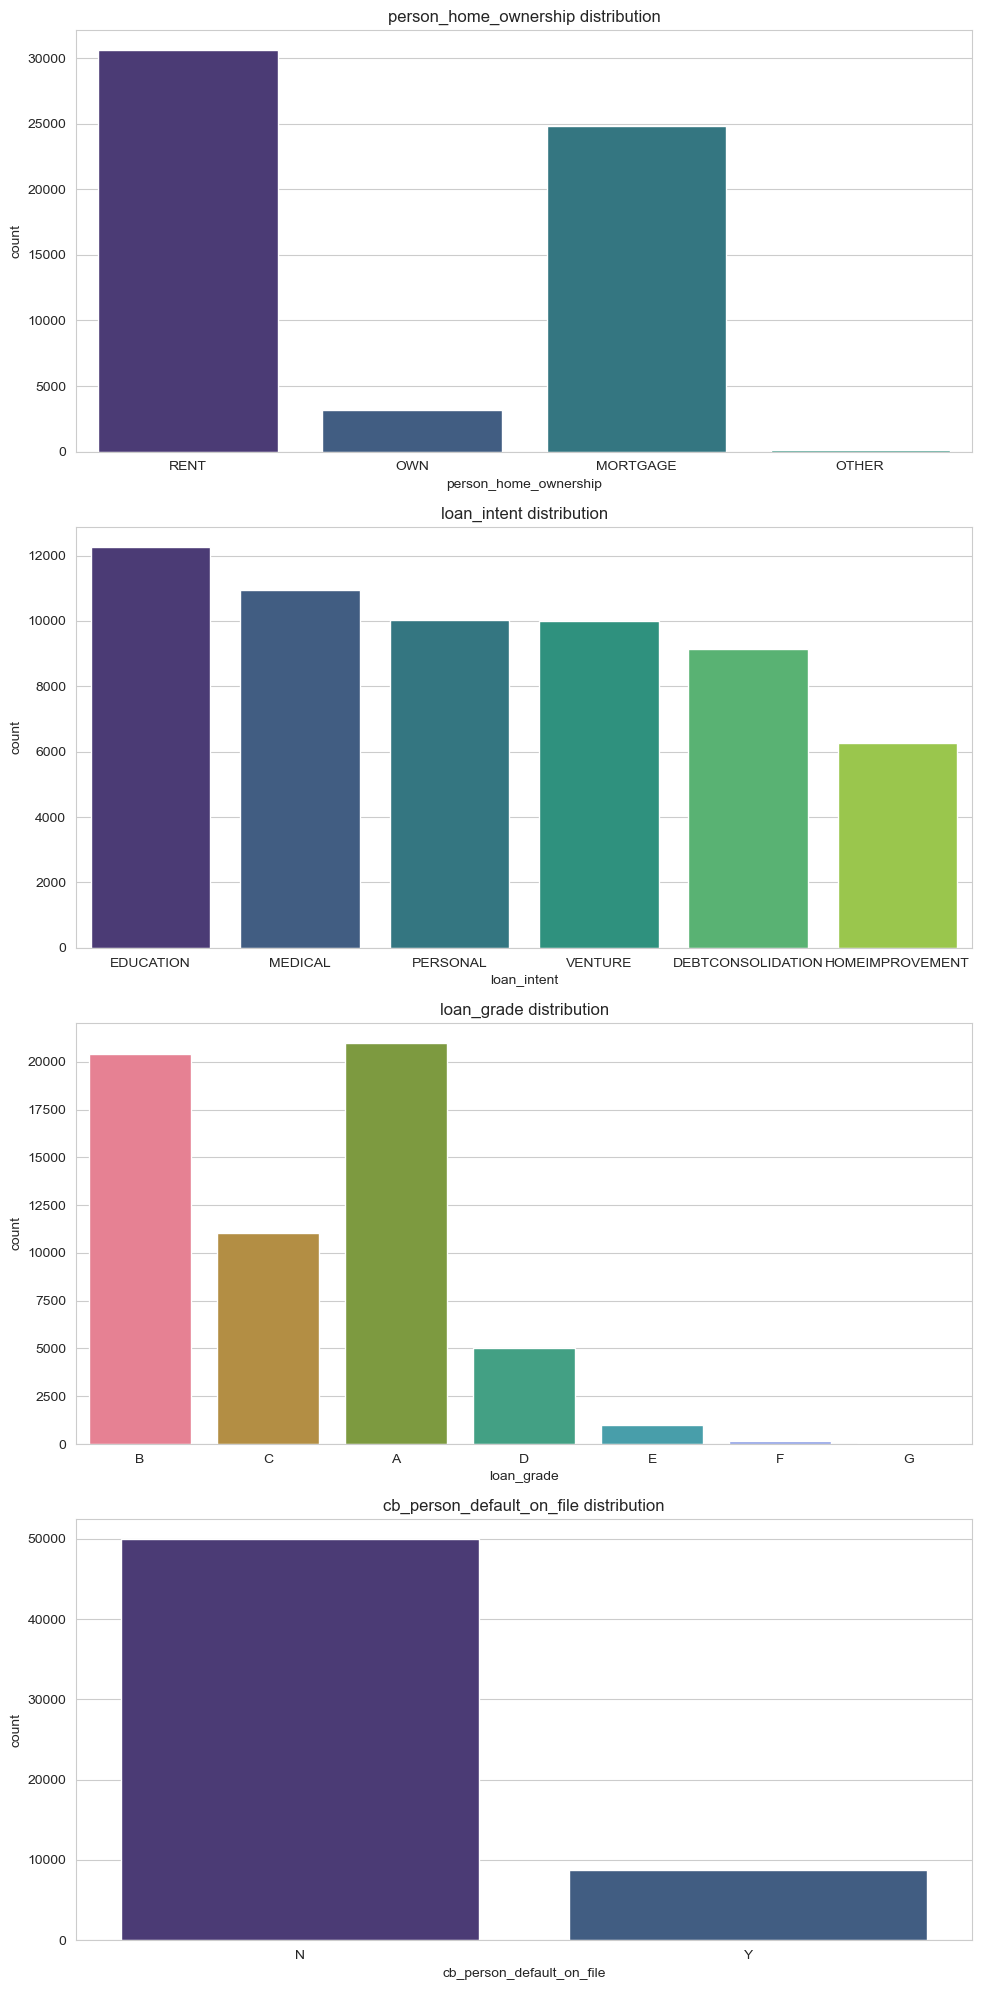

In [104]:
cat_col_plots(df,cat_cols)

# Observations
1. There are quite uneven distributions for each categorical value
2. There are rarer categories such as in loan_grade (F and G). Potentially better to bin into 'Other'


In [106]:
mask = (df['loan_grade'] == 'G') | (df['loan_grade'] == 'F')
df.loc[mask,'loan_grade'] = "Other"

# Missing Values
1. Determine missing values if any
2. Uncover patterns and possible imputation or filling 

In [112]:
df.isnull().sum() # No nuls, can proceed without any imputation

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

# Correlation Analysis
1. See if there are any correlations between numerical, categorical and target values

<Axes: >

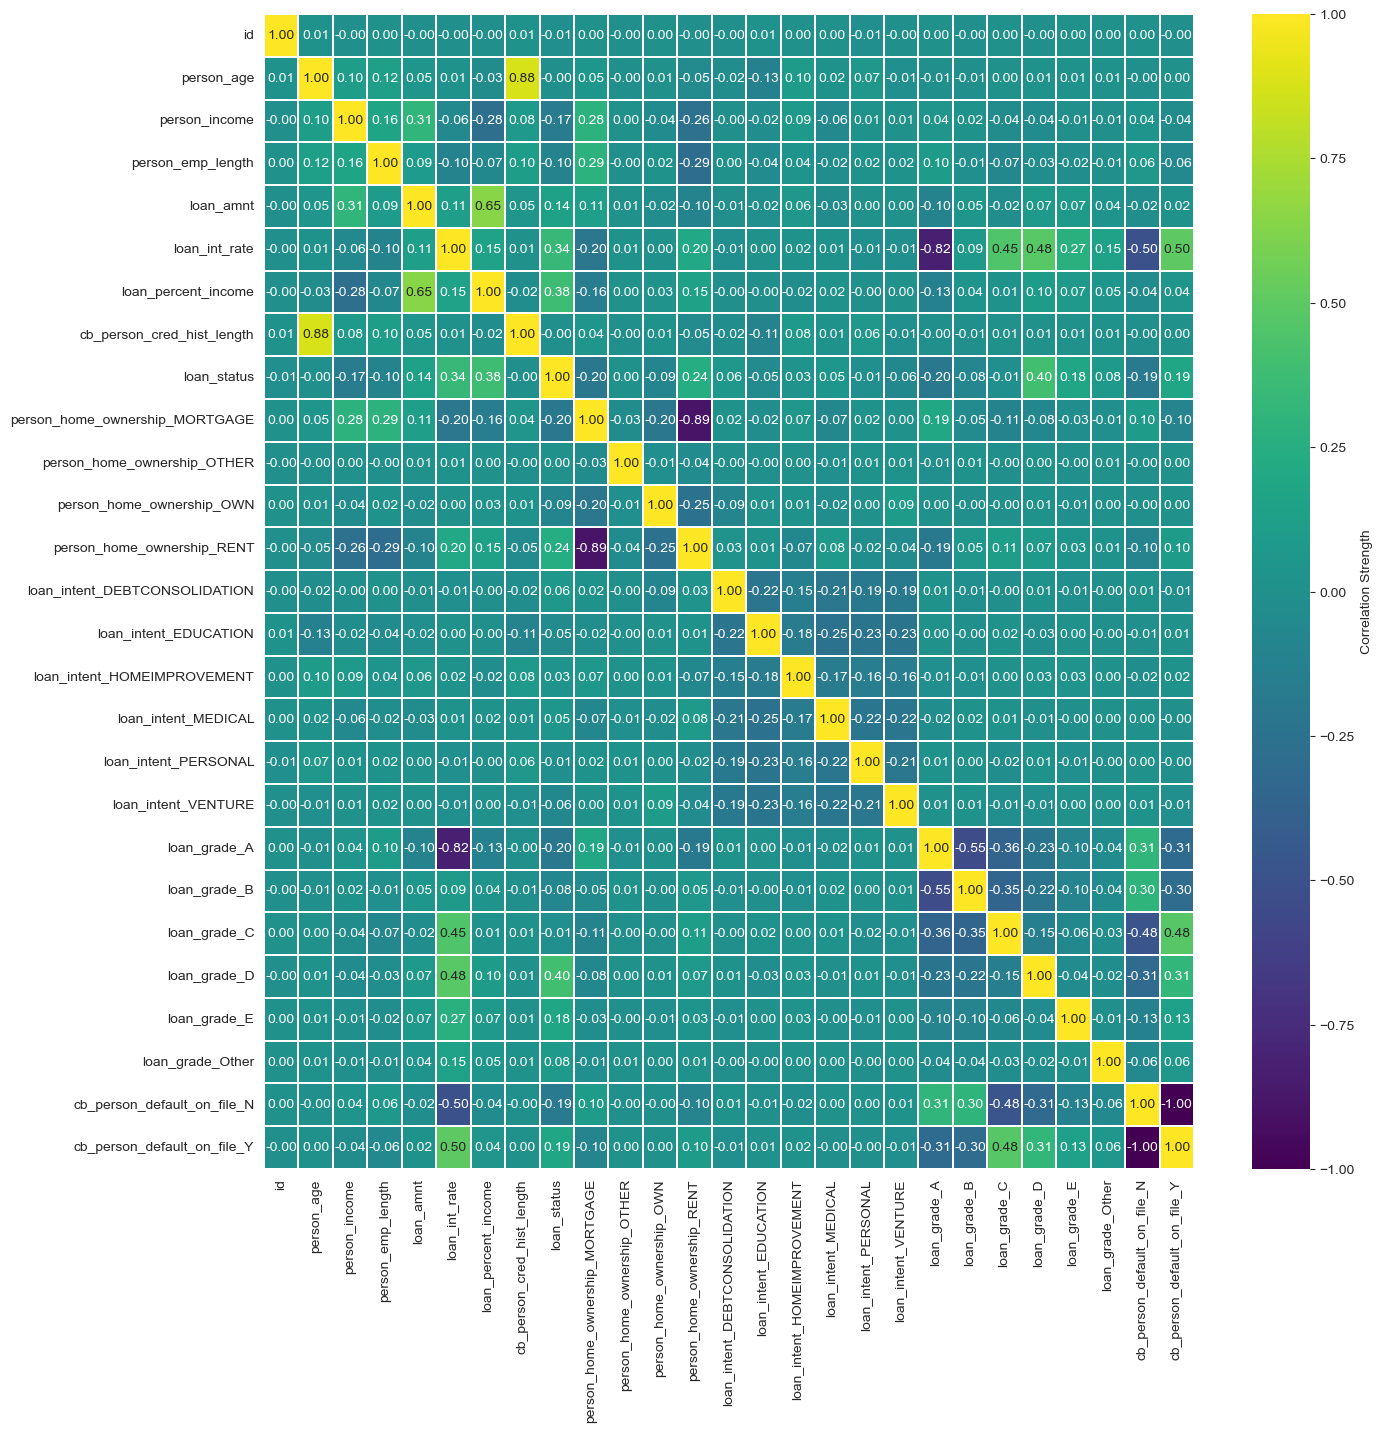

In [118]:
encoded_df = pd.get_dummies(df,drop_first =False)
df_corr = encoded_df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(df_corr, cmap='viridis', fmt='.2f', annot=True,linewidths=0.3,cbar=True, cbar_kws={'label': 'Correlation Strength'}
)

# Observations
1. Age and credit history length are highly correlated. May be helpful to combine the features 


# Preprocessing

In [119]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [189]:
def feature_engineering(df):
    X = df.copy()
    #Log income, emp length, age_history, loan amount
    X['log_loan_amnt'] = np.log(X['loan_amnt'].replace(0, np.nan))
    X['log_emp_length'] = np.log(X['person_emp_length'].replace(0, np.nan))
    X['log_income'] = np.log(X['person_income'].replace(0, np.nan))
    X.drop(columns=['person_age','cb_person_cred_hist_length']) 
    X.drop(columns=['id'])
    X.drop(columns=['loan_amnt','person_emp_length','person_income'])
    return X
    

# Create pipeline and initialize model

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import xgboost as xgb
# Tuning with randomsearch
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [128]:
X = df.drop(columns='loan_status')
y= df['loan_status']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=43)

In [178]:
results = []

In [233]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    colsample_bytree=1.0,
    scale_pos_weight=1,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1
)

In [235]:
param_distributions = {
  'model__n_estimators': randint(100, 1000),
  'model__max_depth': randint(3, 10),
  'model__learning_rate': uniform(0.01, 0.29),  # from 0.01 to 0.3
  'model__subsample': uniform(0.6, 0.4),        # from 0.6 to 1.0
  'model__colsample_bytree': uniform(0.6, 0.4), # from 0.6 to 1.0
  'model__min_child_weight': randint(1, 7),
  'model__gamma': uniform(0, 5),
  'model__reg_alpha': [0, 1e-5, 1e-2, 0.1, 1, 100],
  'model__reg_lambda': [0, 1e-5, 1e-2, 0.1, 1, 100]
}

In [236]:
def pipeline_stack_with_random_search(X_train, y_train, X_test, y_test, model, param_distributions, n_iter=10, cv=5):
    num_pipeline = Pipeline(steps=[
        ('scaler',StandardScaler())
    ])

    cat_pipeline = Pipeline(steps=[
        ('onehot',OneHotEncoder())
    ])

    col_transformer = ColumnTransformer(transformers = [
        ('num_pipeline',num_pipeline, num_cols),
        ('cat_pipeline',cat_pipeline, cat_cols)
    ],
        remainder = 'passthrough',
        n_jobs = -1
    )

    pipeline_final = Pipeline(steps = [
        ('feature_engineering',FunctionTransformer(feature_engineering)),
        ('col_transformer',col_transformer),
        ('model',model)
    ])

    random_search = RandomizedSearchCV(
        pipeline_final,
        param_distributions=param_distributions,
        n_iter=n_iter,
        cv=cv,
        n_jobs=-1,
        verbose=2,
        scoring='accuracy',
        random_state=42
    )
    
    random_search.fit(X_train, y_train)
    
    # Get best model and make predictions
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return {
        'best_model': best_model,
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_,
        'test_accuracy': accuracy,
        'cv_results': random_search.cv_results_
    }

In [238]:
results = pipeline_stack_with_random_search(
    X_train, y_train, X_test, y_test, model, param_distributions,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5        # Number of cross-validation folds
)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
